<a href="https://colab.research.google.com/github/ShezaMunir/GoogleDSC-Project/blob/main/GoogleDSC_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Online Platform Participation and Student Performance**

Understanding student's online behavior and their relations inside real class gradings

This Dataset was compiled after 4 months of an Algorithm Introductory Class at a Brazilian University.

A traditional grading system was adopted as evaluation of the students performance, and, at the same time, an online environment let students share posts, answers and classify productions with emojis-based reactions.

The Class was project-based and the evaluation of the skills followed the so-called "21th Century Skills", in a scale from 0 to 10 each Skill:

Critical Thinking and Problem Solving Skills - named as SK1;<br>
Criativity and Inovation Skills - named as SK2;<br>
Constant and Self Learning Skills - named as SK3;<br>
Collaboration and Self-Direction Skills - named as SK4;<br>
Social and Cultural Responsability - named as SK5.<br>
At the online learning environment, the students could post and classify colleagues postings with some reactions. 

The Dataset contains, one unique student per row, the amount of reactions of each type received by the student by other student as well as his gradings in each Skills evaluated by the professor.

Our main question is: What is link between the reactions and the skill levels shown by the student? Is there some sort of interesting findings? 

Kaggle Link: https://www.kaggle.com/marlonferrari/elearning-student-reactions



In [ ]:
'''
Importing relevant libraries
'''
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import matplotlib.patches as mpatches
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
'''
Mounting the drive
'''
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [ ]:
'''
The dataset is present in the file ocd.csv
'''
data = pd.read_csv('ocd.csv')
data.head(5)

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
0,0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,"2,1","2,4","3,5","3,6","1,7",0
1,1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,"0,3","0,3",0,"0,1","0,2",0
2,2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


In [ ]:
data.sample(5)

,Unnamed: 0,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_classroom,sk2_classroom,sk5_classroom,sk3_classroom,sk4_classroom,Approved
38,38,7.0,9.0,16.0,35.0,0.0,27.0,0.0,27.0,18510.0,"8,3","8,7",7,"8,7","9,7",1
62,62,3.0,0.0,0.0,4.0,0.0,11.0,0.0,7.0,2944.0,7,8,8,7,10,1
53,53,8.0,4.0,19.0,8.0,0.0,26.0,0.0,25.0,3377.0,7,8,8,7,10,1
67,67,6.0,5.0,14.0,16.0,5.0,24.0,0.0,22.0,13221.0,"6,7","6,7",4,"8,3","9,4",1
4,4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,"8,7",9,"6,5",10,"8,8",1


Lets have a look at the shape of the dataset and identify its granularity (i.e. what each row represents)

In [ ]:
data.shape

(71, 16)

**To do:** Someone pls discuss the shape here

Now that we have looked at the shape and identified the granularity, its time to see what columns we have - what they represent, their datatypes etc.


In [ ]:
data.columns

Index(['Unnamed: 0', 'total_posts', 'helpful_post', 'nice_code_post',
       'collaborative_post', 'confused_post', 'creative_post', 'bad_post',
       'amazing_post', 'timeonline', 'sk1_classroom', 'sk2_classroom',
       'sk5_classroom', 'sk3_classroom', 'sk4_classroom', 'Approved'],
      dtype='object')

We see a column name "Unnamed: 0". By looking at the dataframe, we see that its nothing but the student number. Lets rename the column and standardize the rest to lower case. 

In [ ]:
# Set unknown column name to student_num
data.rename(columns={'Unnamed: 0': 'student_num', 'sk1_classroom':'sk1_score', 'sk2_classroom':'sk2_score',
                    'sk3_classroom':'sk3_score', 'sk4_classroom':'sk4_score', 'sk5_classroom':'sk5_score', 'Approved':'approved'}, inplace=True)
data.columns

Index(['student_num', 'total_posts', 'helpful_post', 'nice_code_post',
       'collaborative_post', 'confused_post', 'creative_post', 'bad_post',
       'amazing_post', 'timeonline', 'sk1_score', 'sk2_score', 'sk5_score',
       'sk3_score', 'sk4_score', 'approved'],
      dtype='object')

The column 'student_num', however, is a repetition of the index. We need to keep one of them. So, we'll drop the entire column and use the index instead.

In [ ]:
data.drop('student_num', inplace=True, axis=1)

Now that the column names are standardized and we know what each column represents, lets check the datatype of each

In [ ]:
data.dtypes

total_posts           float64
helpful_post          float64
nice_code_post        float64
collaborative_post    float64
confused_post         float64
creative_post         float64
bad_post              float64
amazing_post          float64
timeonline            float64
sk1_score              object
sk2_score              object
sk5_score              object
sk3_score              object
sk4_score              object
approved                int64
dtype: object

Lets check the count of values in each column to see if there are any missing values that we need to account for.

In [ ]:
data.describe()

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,approved
count,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000,71.000000
mean,5.507042,4.028169,7.478873,11.366197,0.549296,18.309859,0.056338,18.957746,10279.126761,0.704225
std,6.480461,6.843082,12.746831,13.970622,1.350013,21.930795,0.287219,22.086477,10176.243372,0.459639
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.500000,0.000000,6.500000,0.000000,7.000000,1627.500000,0.000000
50%,4.000000,3.000000,2.000000,7.000000,0.000000,14.000000,0.000000,16.000000,7664.000000,1.000000
75%,7.500000,5.500000,12.500000,16.000000,0.000000,24.000000,0.000000,25.500000,16574.000000,1.000000
max,46.000000,53.000000,90.000000,89.000000,7.000000,150.000000,2.000000,155.000000,43612.000000,1.000000


Notice that the scores have a comma in between the values. The values should have been continous numbers between 0-10. So we interpret this an a mistake while data entry, and should be replaced with a decimal instead. Also, we need to then change the type to float

In [ ]:
# One way to do so can be to iterate over all the score columns and convert ',' to '.'
my_list = ['sk1_score','sk2_score', 'sk3_score', 'sk4_score', 'sk5_score']
rows = data.shape[0]
for score in my_list:
  data[score] = data.loc[:, score].str.replace(',','.')

data

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,timeonline,sk1_score,sk2_score,sk5_score,sk3_score,sk4_score,approved
0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,1600.0,2.1,2.4,3.5,3.6,1.7,0
1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,592.0,0.3,0.3,0,0.1,0.2,0
2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,1110.0,8,5,5,7,5,1
3,5.0,1.0,3.0,9.0,2.0,11.0,0.0,8.0,8651.0,6,5,4,6,4,1
4,14.0,6.0,15.0,28.0,0.0,50.0,0.0,45.0,34172.0,8.7,9,6.5,10,8.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,46.0,53.0,90.0,89.0,3.0,150.0,0.0,155.0,39314.0,10,10,8,10,10,1
67,6.0,5.0,14.0,16.0,5.0,24.0,0.0,22.0,13221.0,6.7,6.7,4,8.3,9.4,1
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988.0,0,0,0,0.1,0,0
69,2.0,2.0,2.0,2.0,0.0,7.0,0.0,9.0,2100.0,2.2,1.9,2.5,1.1,8.4,0


In [ ]:
'''
This is another way to do so. This involves various functions such as apply(), drop(), concat()...
So it creates a smaller dataframe with cleaned values (without commas), drops the score columns from the original df, and finally concats the two.

sub_data = data.loc[:,['sk1_score','sk2_score', 'sk3_score', 'sk4_score', 'sk5_score']].apply(lambda x: x.str.replace(',','.')) # corrected values of scores
data = data.drop(['sk1_score','sk2_score', 'sk3_score', 'sk4_score', 'sk5_score'], axis=1) # drop original scores
data = pd.concat([data, sub_data], axis=1, join="inner") # concatenate both dataframes
'''

'\nThis is another way to do so. This involves various functions such as apply(), drop(), concat()...\nSo it creates a smaller dataframe with cleaned values (without commas), drops the score columns from the original df, and finally concats the two.\n\nsub_data = data.loc[:,[\'sk1_score\',\'sk2_score\', \'sk3_score\', \'sk4_score\', \'sk5_score\']].apply(lambda x: x.str.replace(\',\',\'.\')) # corrected values of scores\ndata = data.drop([\'sk1_score\',\'sk2_score\', \'sk3_score\', \'sk4_score\', \'sk5_score\'], axis=1) # drop original scores\ndata = pd.concat([data, sub_data], axis=1, join="inner") # concatenate both dataframes\n'

In [ ]:
'''
Convert type of score columns to float
'''             
data[["sk1_score", "sk2_score", "sk3_score", "sk4_score", "sk5_score"]] = data[["sk1_score", "sk2_score", 
            "sk3_score", "sk4_score", "sk5_score"]].apply(pd.to_numeric) 
data.dtypes

total_posts           float64
helpful_post          float64
nice_code_post        float64
collaborative_post    float64
confused_post         float64
creative_post         float64
bad_post              float64
amazing_post          float64
timeonline            float64
sk1_score             float64
sk2_score             float64
sk5_score             float64
sk3_score             float64
sk4_score             float64
approved                int64
dtype: object

**Creating a Column for Average Score**</br>
We will take the average of all five skill scores and add it as another column in the dataframe

In [ ]:
avg_score = data.loc[:,['sk1_score',	'sk2_score',	'sk3_score',	'sk4_score',	'sk5_score']].mean(axis = 1)
data.insert(15,"avg_score", avg_score)

**Creating a Column for Post Quality**</br>
We will find the overall post quality by using the overall effect of positive and negative reactions.

In [ ]:
post_quality = data["helpful_post"] + data["nice_code_post"] +  data["collaborative_post"] + data["creative_post"] + data["amazing_post"] -  data["confused_post"] -  data["bad_post"]
data.insert(16,"post_quality", post_quality)


Lets confirm that we have successfully added the columns by checking the shape of the data frame

In [ ]:
data.shape

(71, 17)

Perfect! Now, lets rearrange the columns a bit. 

In [ ]:
'''
Just some re-organization as in the original dataset
'''
data = data[['total_posts',	'helpful_post',	'nice_code_post',	'collaborative_post','confused_post',	'creative_post',	'bad_post',
             'amazing_post', 'post_quality',	'timeonline',	'sk1_score',	'sk2_score',	'sk3_score',	'sk4_score',	'sk5_score', 'avg_score', 'approved']]

In [ ]:
data.head(3)

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,post_quality,timeonline,sk1_score,sk2_score,sk3_score,sk4_score,sk5_score,avg_score,approved
0,1.0,0.0,0.0,0.0,0.0,6.0,0.0,1.0,7.0,1600.0,2.1,2.4,3.6,1.7,3.5,2.66,0
1,1.0,0.0,0.0,1.0,0.0,2.0,0.0,3.0,6.0,592.0,0.3,0.3,0.1,0.2,0.0,0.18,0
2,2.0,4.0,3.0,9.0,0.0,16.0,1.0,8.0,39.0,1110.0,8.0,5.0,7.0,5.0,5.0,6.00,1


**Thumbs up!**

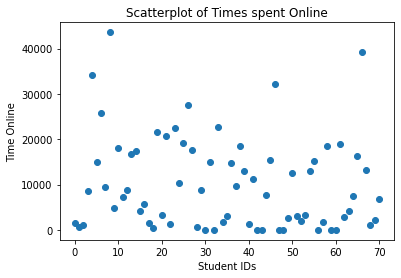

Max value:  43612.0
Min value:  0.0


In [ ]:
'''
Now let's check some individual values to see if they have any discrepencies. We have a distribution of times
Therefore, let's see if some values are out of range maybe.
'''
plt.scatter(data.index, data['timeonline'])
plt.title("Scatterplot of Times spent Online")
plt.xlabel("Student IDs")
plt.ylabel("Time Online")
plt.show()

print("Max value: ", data["timeonline"].max())
print("Min value: ", data["timeonline"].min())

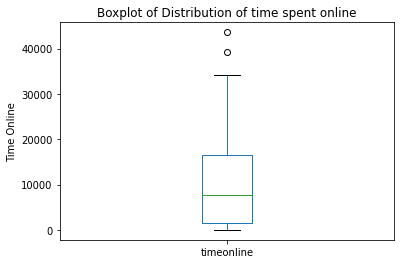

In [ ]:
'''
Some more details using a Boxplot
'''
plt.title("Boxplot of Distribution of time spent online")
plt.ylabel("Time Online")
boxplot = data.boxplot(column=['timeonline'], grid=False)

**To do:** Do you think there are anomalies in the figures shown above? Should higher values of time online be counted as an anomaly? Justify your answer.

# Exploratory Data Analysis

To begin with, we want to figure out whether a correlation exists between different attributes in our dataset. To get a general idea, we plot a correlation matrix. 
Remember, values closer to 1 denote a perfect positive correlation whereas values closer to -1 denote a perfect negative correlation. Values around 0 denote a weak/no correlation.

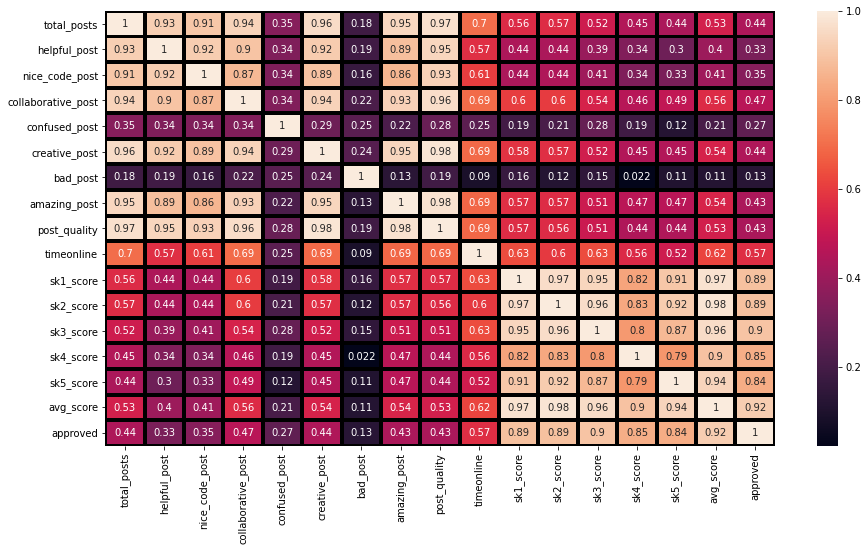

In [ ]:
corr_mat = data.corr()
plt.subplots(figsize=(15,8))
sns.heatmap(corr_mat, annot = True, linewidths=3, linecolor='black')
plt.show()

**To do:** Analyze the correlations shown by the matrix. Which variables do you feel are correlated and why? Which correlation/s might be significant? Feel free to share your thought process.

To get a better idea of some trends being indicated, we wish to observe how scores for each skill changes when number of posts increase. Let's have a look!

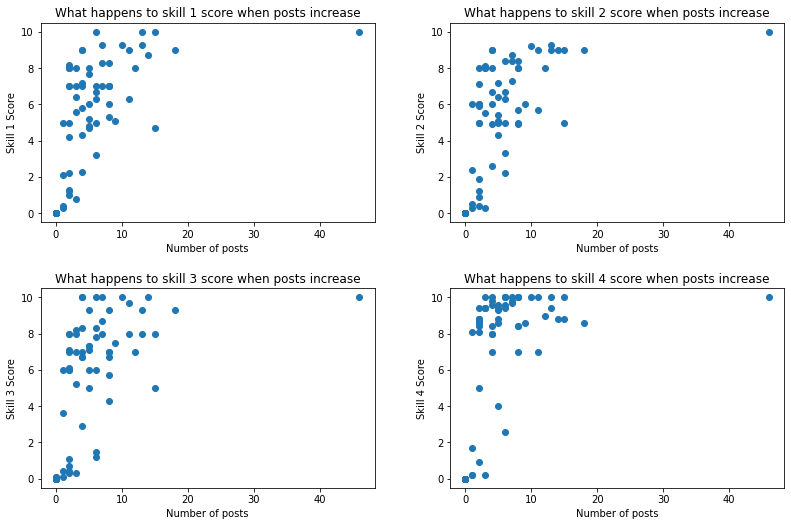

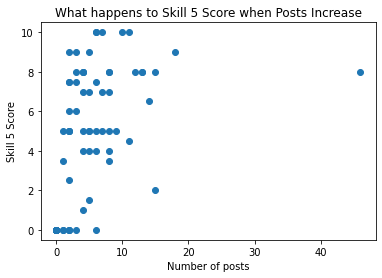

In [ ]:
fig, plot = plt.subplots(2,2, figsize=(12,8))
fig.tight_layout(pad=4.5)

plot[0,0].scatter(data['total_posts'], data['sk1_score'])
plot[0,0].set(xlabel = 'Number of posts', ylabel='Skill 1 Score', title = 'What happens to skill 1 score when posts increase')
plot[0,1].scatter(data['total_posts'], data['sk2_score'])
plot[0,1].set(xlabel = 'Number of posts', ylabel='Skill 2 Score', title = 'What happens to skill 2 score when posts increase')
plot[1,0].scatter(data['total_posts'], data['sk3_score'])
plot[1,0].set(xlabel = 'Number of posts', ylabel='Skill 3 Score', title = 'What happens to skill 3 score when posts increase')
plot[1,1].scatter(data['total_posts'], data['sk4_score'])
plot[1,1].set(xlabel = 'Number of posts', ylabel='Skill 4 Score', title = 'What happens to skill 4 score when posts increase')
plt.show()

ax = plt.subplot()
plt.scatter(data['total_posts'], data['sk5_score'] ) # Scatter plot 2 data
plt.title('What happens to Skill 5 Score when Posts Increase')
plt.ylabel('Skill 5 Score')
plt.xlabel('Number of posts')
plt.show()

In [ ]:
# Weird outlier in num of posts (not exactly an outlier but uss bache ko dekhna pare ga)

Let's also look at the overall ratio of type of reacts received 

Text(0.5, 1.0, 'An Overview of ratio of reacts received in class')

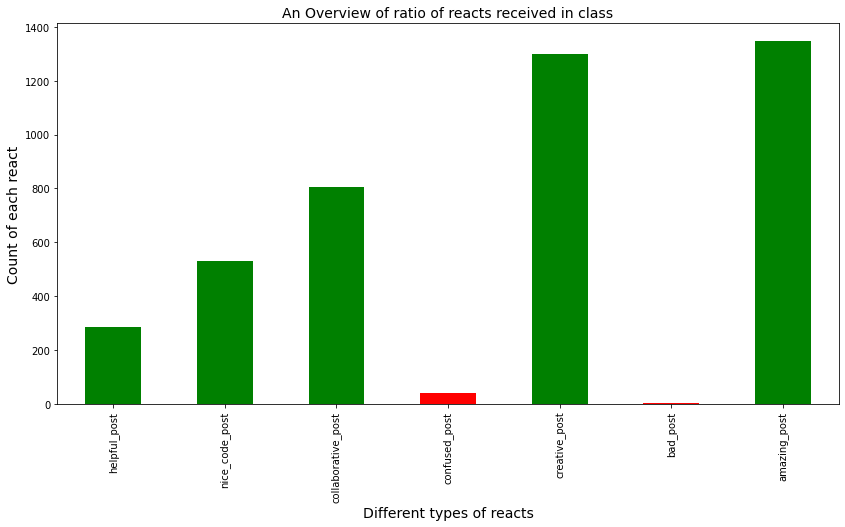

In [ ]:
sum = data.loc[:,['helpful_post', 'nice_code_post', 'collaborative_post',	'confused_post',	'creative_post',	'bad_post',	'amazing_post']].sum(axis=0).plot.bar(figsize=(14,7), 
                                                                                                             color=['green', 'green', 'green', 'red', 'green', 'red', 'green'])
plt.xlabel("Different types of reacts", fontsize = 14)
plt.ylabel("Count of each react", fontsize = 14)
plt.title("An Overview of ratio of reacts received in class", fontsize = 14)


The color coding of bars is in accordance to our categorization of positve and negative reacts on a post. 
As we can see, the ratio of positive reacts received is far greater than the that of negative ones. This can be due to a general feeling of extending support towards fellow peers, and encouraging online participation.

# Question 1:

**To analyze:** Is there a relation between a particular **reaction** on a student's post and a **skillset score** they're getting? Is there a bias of **type of post reactions** on the approval?




*Reactions:*

helpful, nice, collaborative, confused, creative, bad, amazing.


*Skills:*

-SK_1: Critical Thinking and Problem Solving Skills

-SK_2-Creativity and Inovation Skills

-SK_3-Constant and Self Learning Skills

-SK_4-Collaboration and Self-Direction Skills

-SK_5-Social and Cultural Responsability


**We will graphically deduce whether there is a positive relation between a particular type of reaction a student gets and their skill scores.**

[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Helpful Post'),
 Text(0.5, 1.0, 'Helpful Post vs Skill 5 Points')]

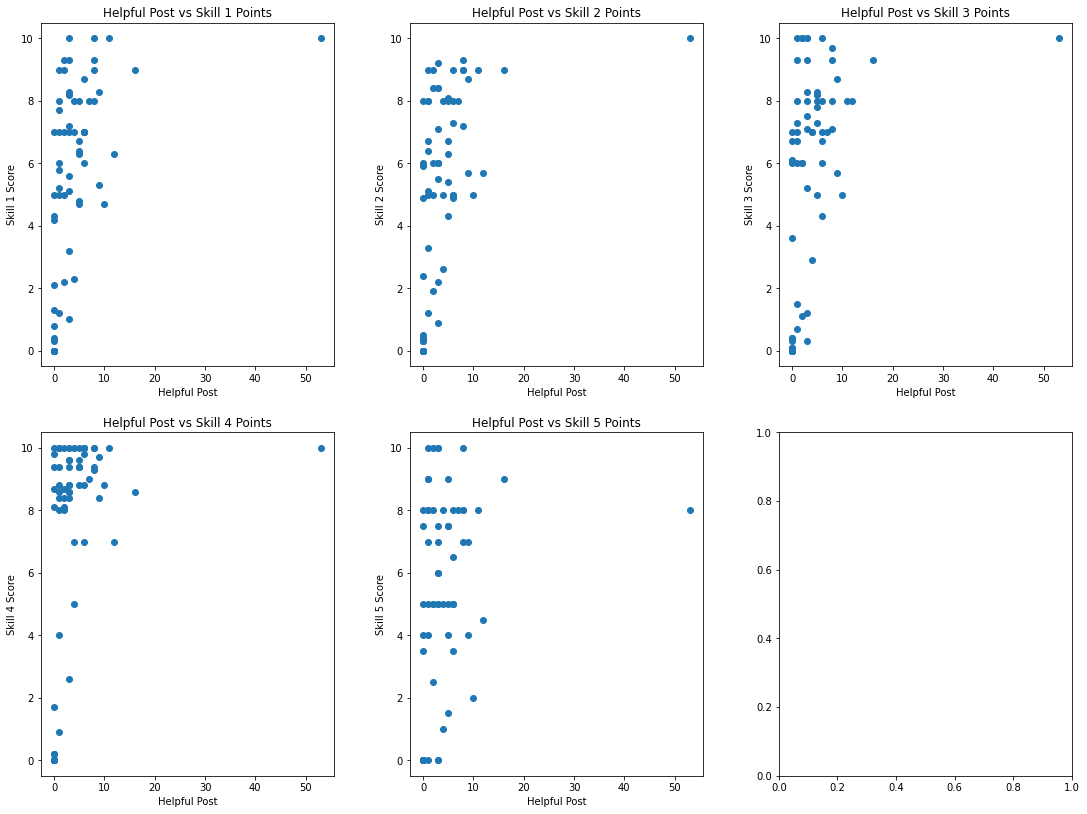

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['helpful_post']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
#plt.figure(figsize=(20,10))
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Helpful Post', ylabel='Skill 1 Score', title = 'Helpful Post vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Helpful Post', ylabel='Skill 2 Score', title = 'Helpful Post vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Helpful Post', ylabel='Skill 3 Score', title = 'Helpful Post vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Helpful Post', ylabel='Skill 4 Score', title = 'Helpful Post vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Helpful Post', ylabel='Skill 5 Score', title = 'Helpful Post vs Skill 5 Points')

There is a positive relation between the skills 1-4 and reaction 'helpful_post'. 

That is, students getting a high number of 'helpful_post' reacts on their posts are more likely to score well in skills 1-4.



[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Nice Code Post'),
 Text(0.5, 1.0, 'Nice Code Post vs Skill 5 Points')]

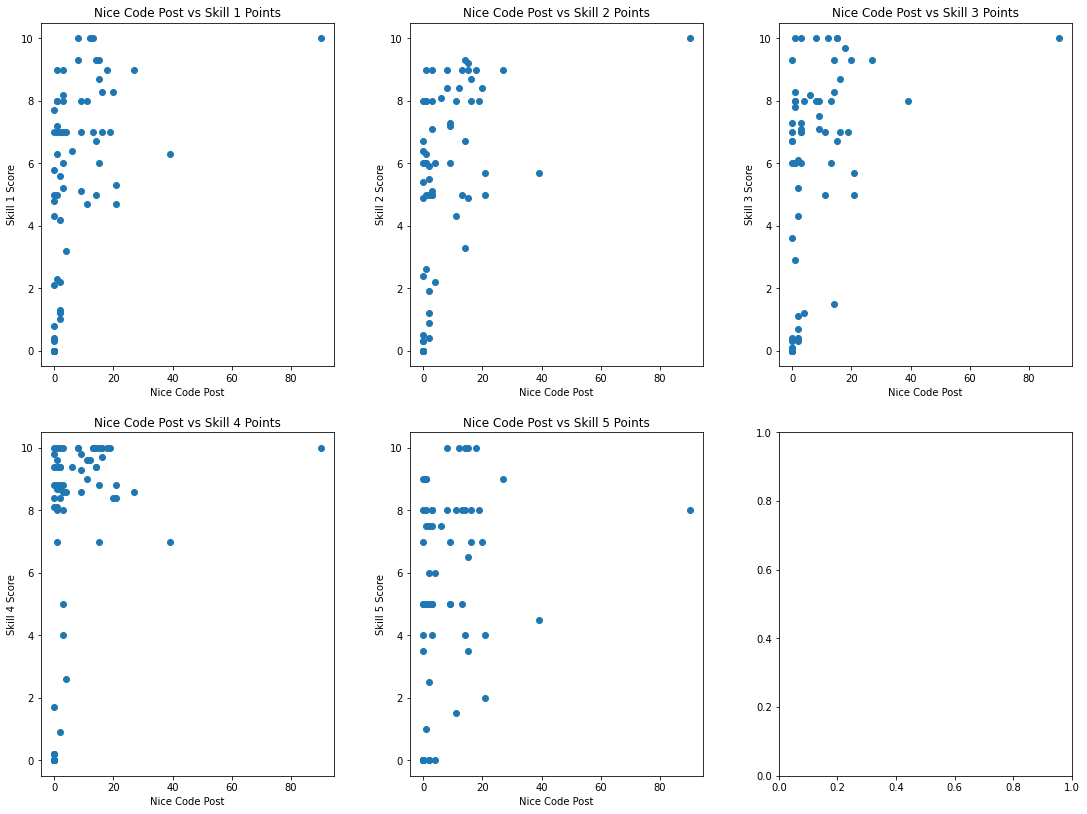

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['nice_code_post']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
#plt.figure(figsize=(20,10))
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Nice Code Post', ylabel='Skill 1 Score', title = 'Nice Code Post vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Nice Code Post', ylabel='Skill 2 Score', title = 'Nice Code Post vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Nice Code Post', ylabel='Skill 3 Score', title = 'Nice Code Post vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Nice Code Post', ylabel='Skill 4 Score', title = 'Nice Code Post vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Nice Code Post', ylabel='Skill 5 Score', title = 'Nice Code Post vs Skill 5 Points')

There is a positive relation between the skills 1-4 and reaction 'nice_post'. 

That is, students getting a high number of nice_post' reacts on their posts are more likely to score well in skills 1-4.

[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Collaborative Post'),
 Text(0.5, 1.0, 'Collaborative Post vs Skill 5 Points')]

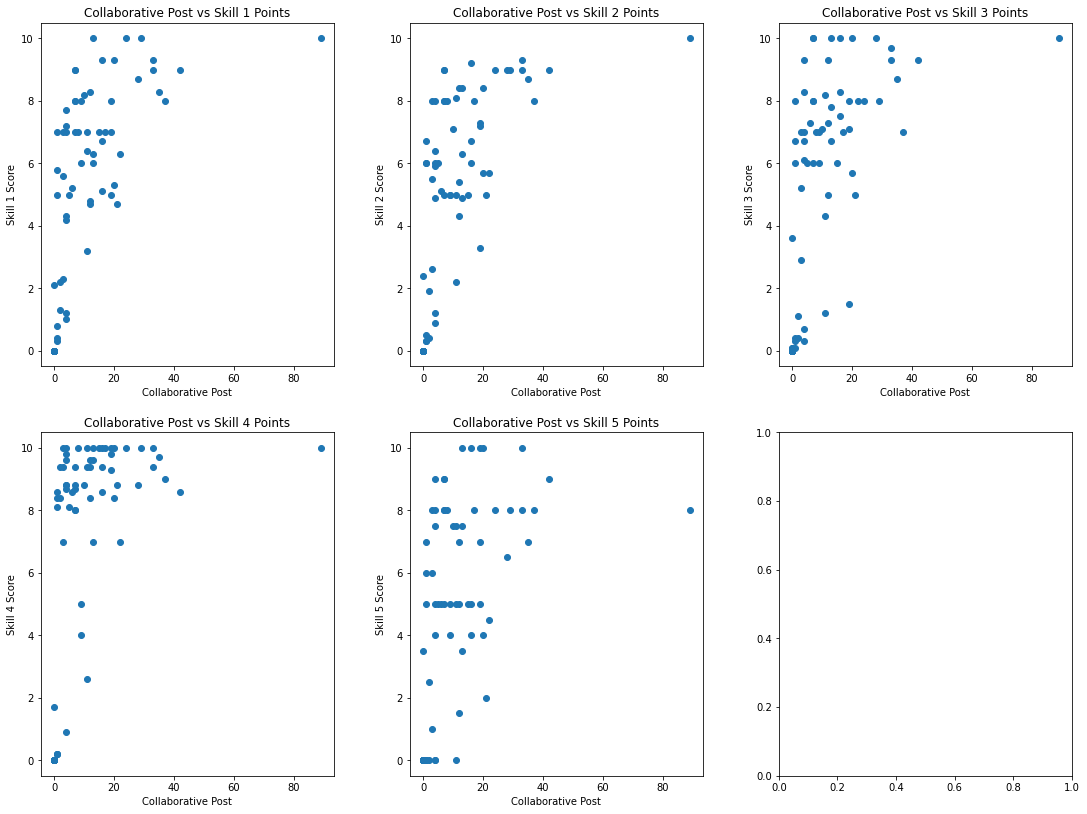

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['collaborative_post']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
#plt.figure(figsize=(20,10))
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Collaborative Post', ylabel='Skill 1 Score', title = 'Collaborative Post vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Collaborative Post', ylabel='Skill 2 Score', title = 'Collaborative Post vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Collaborative Post', ylabel='Skill 3 Score', title = 'Collaborative Post vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Collaborative Post', ylabel='Skill 4 Score', title = 'Collaborative Post vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Collaborative Post', ylabel='Skill 5 Score', title = 'Collaborative Post vs Skill 5 Points')

There is a positive relation between the skills 1-4 and reaction 'collaborative_post'. 

That is, students getting a high number of 'collaborative_post' reacts on their posts are more likely to score well in skills 1-4.


[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Confused Post'),
 Text(0.5, 1.0, 'Confused Post vs Skill 5 Points')]

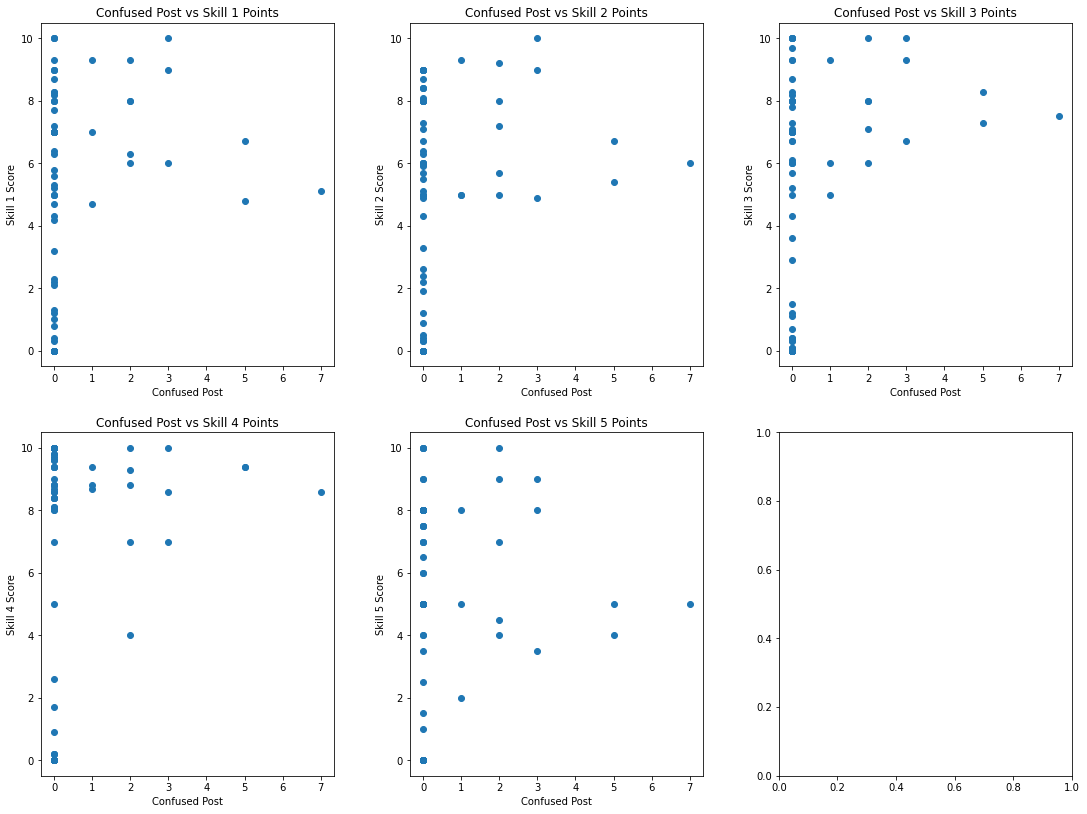

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['confused_post']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
#plt.figure(figsize=(20,10))
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Confused Post', ylabel='Skill 1 Score', title = 'Confused Post vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Confused Post', ylabel='Skill 2 Score', title = 'Confused Post vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Confused Post', ylabel='Skill 3 Score', title = 'Confused Post vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Confused Post', ylabel='Skill 4 Score', title = 'Confused Post vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Confused Post', ylabel='Skill 5 Score', title = 'Confused Post vs Skill 5 Points')

There does not seem to be a relation between 'confused_post' reacts and any skills. 

[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Creative Post'),
 Text(0.5, 1.0, 'Creative Post vs Skill 5 Points')]

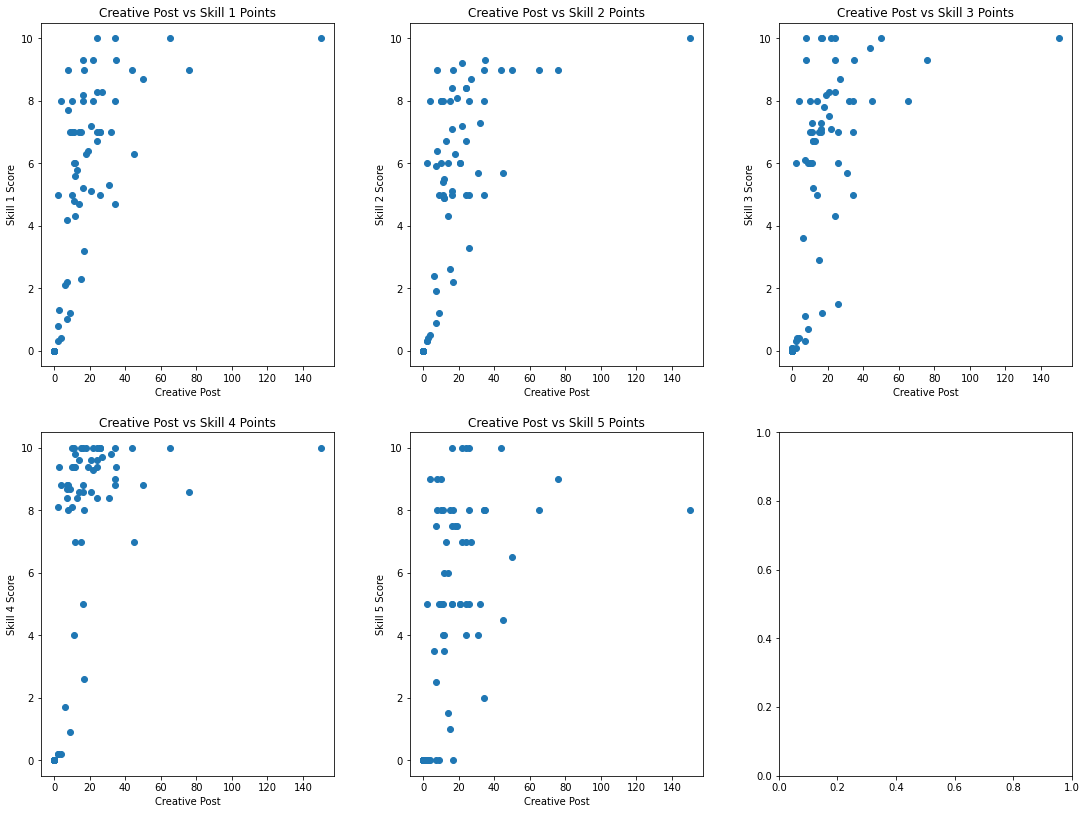

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['creative_post']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
#plt.figure(figsize=(20,10))
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Creative Post', ylabel='Skill 1 Score', title = 'Creative Post vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Creative Post', ylabel='Skill 2 Score', title = 'Creative Post vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Creative Post', ylabel='Skill 3 Score', title = 'Creative Post vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Creative Post', ylabel='Skill 4 Score', title = 'Creative Post vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Creative Post', ylabel='Skill 5 Score', title = 'Creative Post vs Skill 5 Points')

There is a positive relation between the skills 1-4 and reaction 'creative_post'. 

That is, students getting a high number of 'creative_post' reacts on their posts are more likely to score well in skills 1-4.


[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Bad Post'),
 Text(0.5, 1.0, 'Bad Post vs Skill 5 Points')]

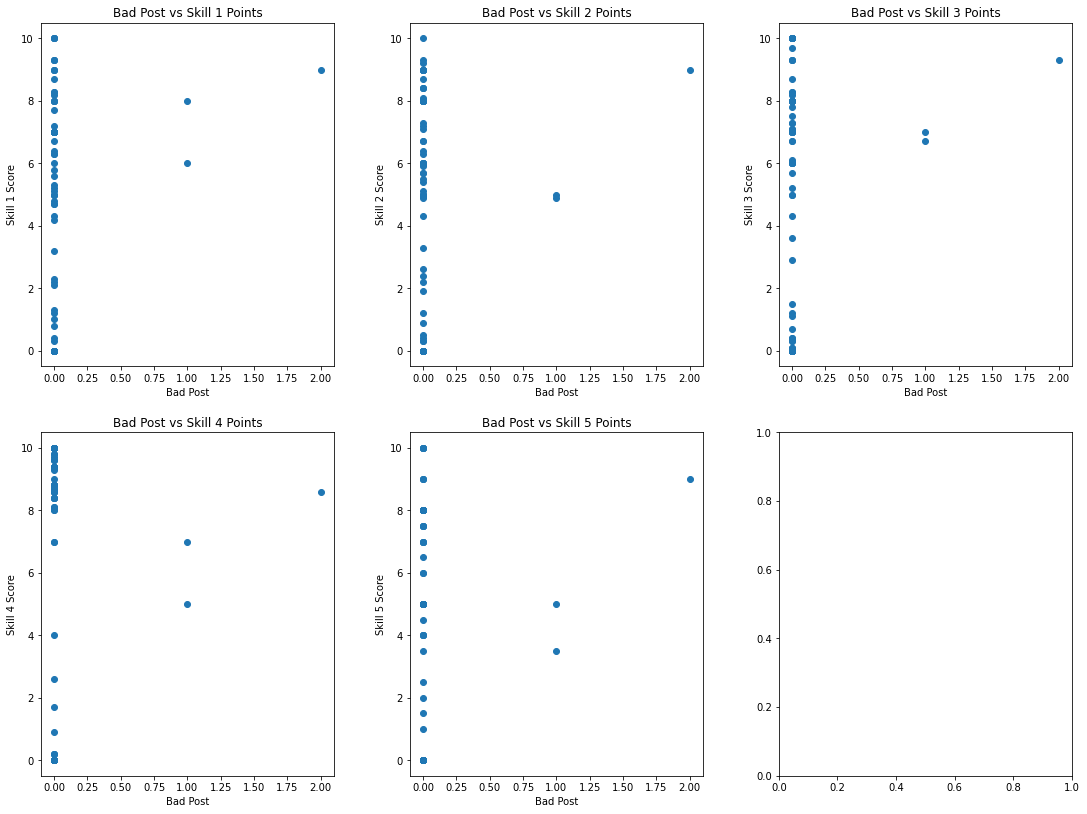

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['bad_post']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
#plt.figure(figsize=(20,10))
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Bad Post', ylabel='Skill 1 Score', title = 'Bad Post vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Bad Post', ylabel='Skill 2 Score', title = 'Bad Post vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Bad Post', ylabel='Skill 3 Score', title = 'Bad Post vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Bad Post', ylabel='Skill 4 Score', title = 'Bad Post vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Bad Post', ylabel='Skill 5 Score', title = 'Bad Post vs Skill 5 Points')

There does not seem to be a link between 'bad_post' reacts and a student's skill scores. 

[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Amazing Post'),
 Text(0.5, 1.0, 'Aamazing Post vs Skill 5 Points')]

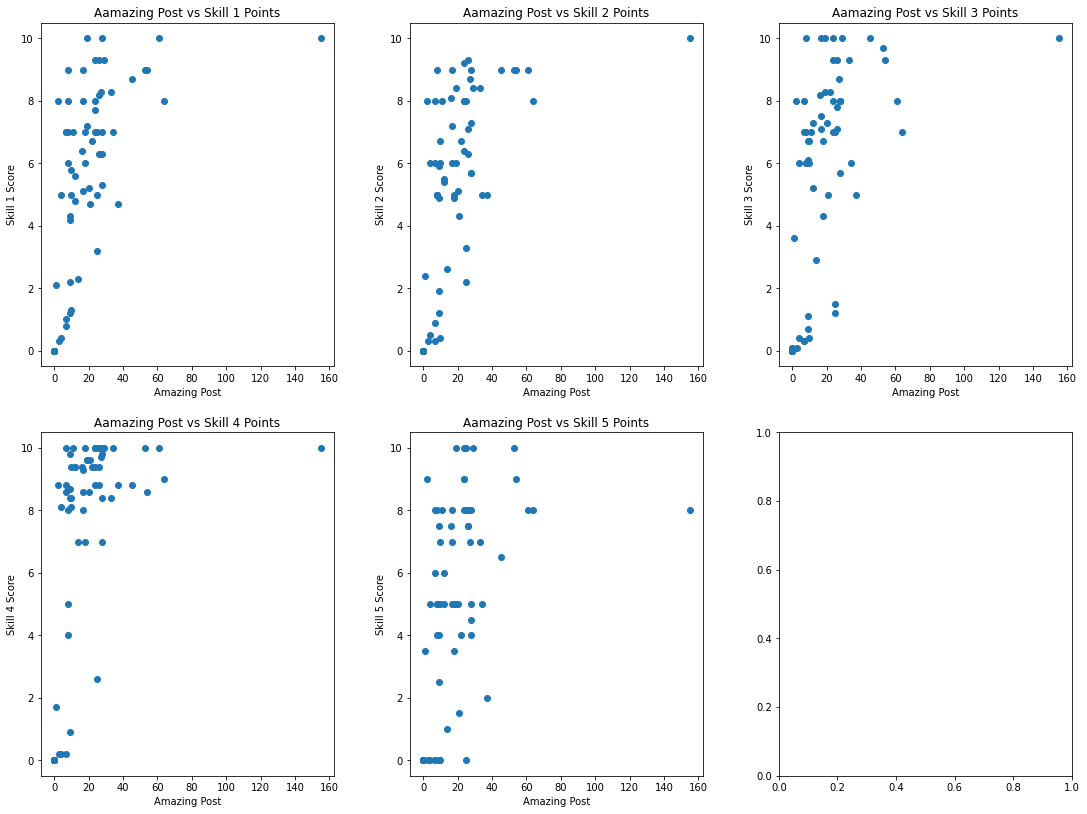

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['amazing_post']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Amazing Post', ylabel='Skill 1 Score', title = 'Aamazing Post vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Amazing Post', ylabel='Skill 2 Score', title = 'Aamazing Post vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Amazing Post', ylabel='Skill 3 Score', title = 'Aamazing Post vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Amazing Post', ylabel='Skill 4 Score', title = 'Aamazing Post vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Amazing Post', ylabel='Skill 5 Score', title = 'Aamazing Post vs Skill 5 Points')

There is a positive relation between the skills 1,2,4 and reaction 'amazing_post'. 

That is, students getting a high number of 'amazing_post' reacts on their posts are more likely to score well in skills 1,2,4.



[Text(432.2308823529412, 0.5, 'Skill 5 Score'),
 Text(0.5, 87.0000000000001, 'Post Quality'),
 Text(0.5, 1.0, 'Post Quality vs Skill 5 Points')]

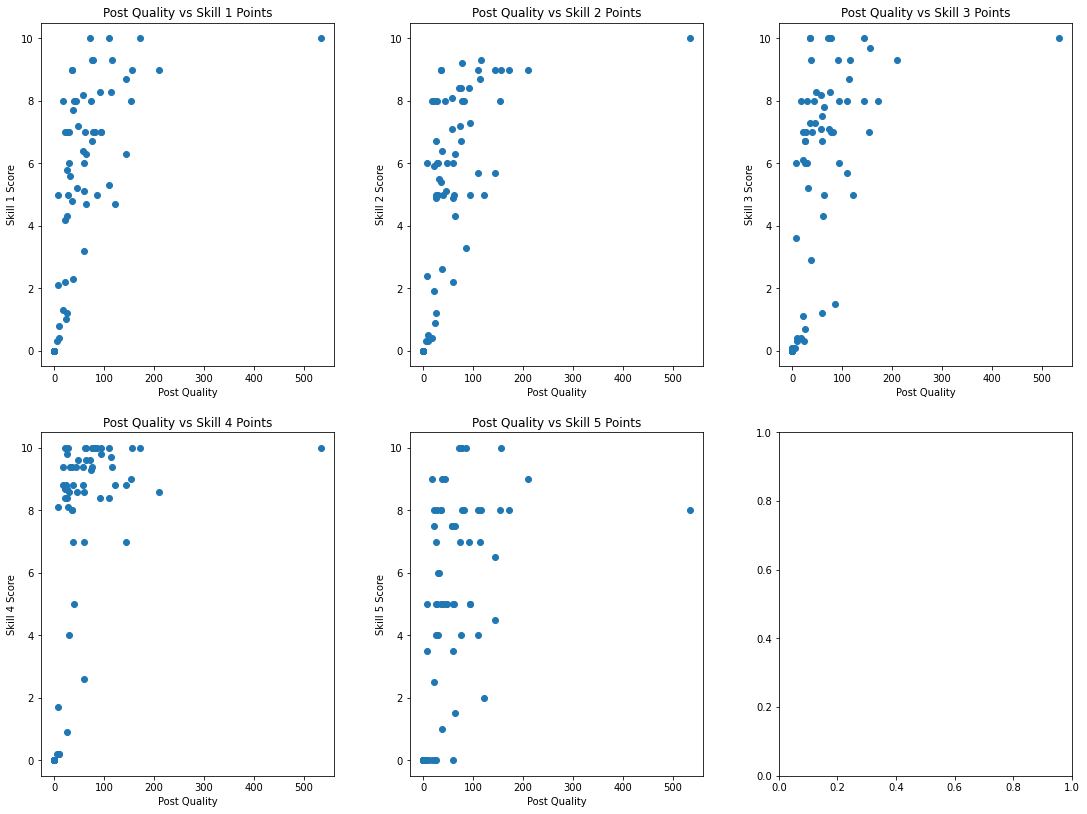

In [ ]:
fig, plot = plt.subplots(2,3, figsize=(16,12))
fig.tight_layout(pad=4.5)
x_coordinate = data['post_quality']
sk1_score = data['sk1_score']
sk2_score = data['sk2_score']
sk3_score = data['sk3_score']
sk4_score = data['sk4_score']
sk5_score = data['sk5_score']
plot[0,0].scatter(x_coordinate, sk1_score, label = 'sk1_score')
plot[0,0].set(xlabel = 'Post Quality', ylabel='Skill 1 Score', title = 'Post Quality vs Skill 1 Points')
plot[0,1].scatter(x_coordinate, sk2_score, label = 'sk2_score')
plot[0,1].set(xlabel = 'Post Quality', ylabel='Skill 2 Score', title = 'Post Quality vs Skill 2 Points')
plot[0,2].scatter(x_coordinate, sk3_score, label = 'sk3_score')
plot[0,2].set(xlabel = 'Post Quality', ylabel='Skill 3 Score', title = 'Post Quality vs Skill 3 Points')
plot[1,0].scatter(x_coordinate, sk4_score, label = 'sk4_score')
plot[1,0].set(xlabel = 'Post Quality', ylabel='Skill 4 Score', title = 'Post Quality vs Skill 4 Points')
plot[1,1].scatter(x_coordinate, sk5_score, label = 'sk5_score')
plot[1,1].set(xlabel = 'Post Quality', ylabel='Skill 5 Score', title = 'Post Quality vs Skill 5 Points')

There is a positive relation between the skills 1-4 and post quality. 

That is, students getting a high number of positive reacts (nice, collaborative, amazing, creative, helpful) on their posts are more likely to score well in skills 1-4, and in turn more likely to get approved. 


Let's also try to find the avg_score that was require to classify a student as either approved or not approved. We can use a scatter plot for this

Text(0.5, 0, 'Average Score')

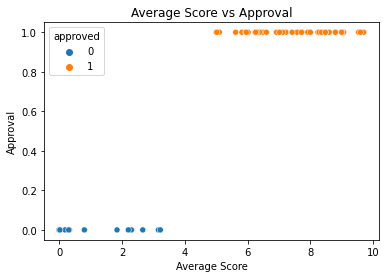

In [ ]:
sns.scatterplot(x="avg_score", y="approved", hue='approved', data=data)
plt.title('Average Score vs Approval')
plt.ylabel('Approval')
plt.xlabel('Average Score')


The threshold for approval comes out to be ~4.5.

There is an apparent relation between the (types and number of) reacts on a student's posts and their skill scores. All types of reacts have a varying positive relation except 'bad_post' and 'confused_post'. 

(Assumption): This may be due to the sociological bias that students did not react negatively to their peers' posts.

#Question 2

How does the time spent on online classroom platform affect the quality of posts a student makes (judged by the reactions received)? 

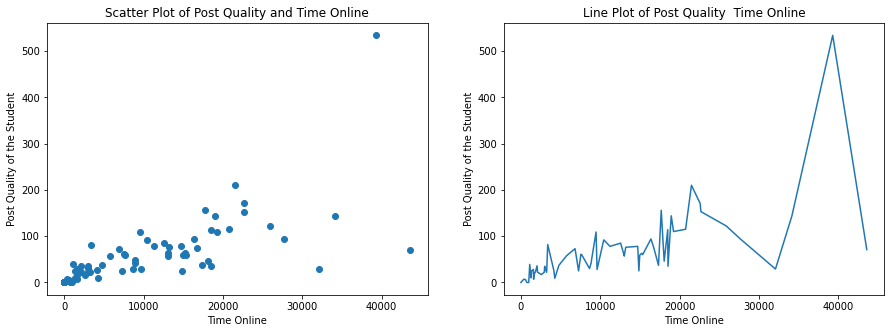

In [ ]:
fig, plot = plt.subplots(1,2, figsize=(15,5))

plot[0].scatter(data['timeonline'],data['post_quality'] )
plot[0].set(xlabel = 'Time Online', ylabel='Post Quality of the Student', title = 'Scatter Plot of Post Quality and Time Online')

sns.lineplot(ax = plot[1], x='timeonline', y='post_quality', data=data)
plot[1].set(xlabel = 'Time Online', ylabel='Post Quality of the Student', title = 'Line Plot of Post Quality  Time Online')

plt.show()

Generally, the graph has a positive increasing gradient between *Time Online* vs the *Quality of Posts* made by a student. 

How does the number of posts made by a student on an online classroom platform affect their quality (judged by the reactions received)? 

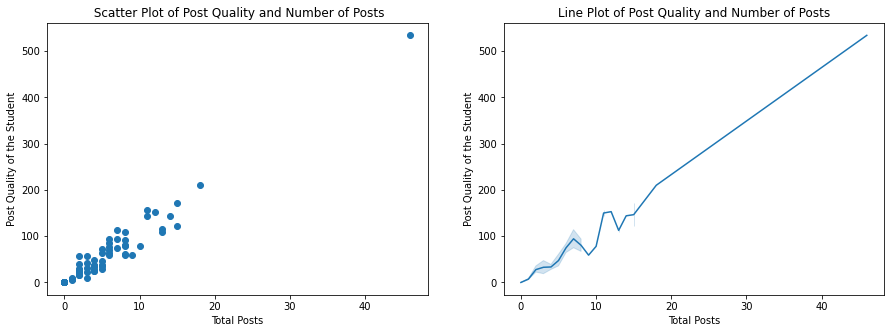

In [ ]:
fig, plot = plt.subplots(1,2, figsize=(15,5))

plot[0].scatter(data['total_posts'],data['post_quality'] )
plot[0].set(xlabel = 'Total Posts', ylabel='Post Quality of the Student', title = ' Scatter Plot of Post Quality and Number of Posts')

sns.lineplot(ax = plot[1], x='total_posts', y='post_quality', data=data)
plot[1].set(xlabel = 'Total Posts', ylabel='Post Quality of the Student', title = 'Line Plot of Post Quality and Number of Posts')

plt.show()



There is an increasing gradient on the graph between total number of posts and the quality of posts made by a student. This means that the more a student posted, the more likely it was that they would post a better quality post. 

If we look at the plots of both the graphs, we notice that the gradient of the scatter plot of "Post Quality vs Number of Posts" has a steeper gradient of line of best fit than "Post Quality vs Time Online". This means that a better post quality is much more dependent on actively posting and performing rather than just spending time online. 

But wasn't this bound to happen? As number of posts increase, post quality will increase as will because of the way we have defined it. We saw earlier how negative posts were very few in comparison to positive posts. And since we are summing values, effect of negative posts will be eliminated, thus producing a positive correlation

To find the net/effective score, we need to take into account the number of posts too. Let's find the average quality of posts

In [ ]:
'''
Computing Effective Post Quality (average)
'''
avg_post_quality = data['post_quality']/data['total_posts']
avg_post_quality

0      7.000000
1      6.000000
2     19.500000
3      6.000000
4     10.285714
        ...    
66    11.608696
67    12.666667
68          NaN
69    11.000000
70    14.600000
Length: 71, dtype: float64

In [ ]:
'''
inserting to dataframe since used extensively ahead
'''
data.insert(9,"eff_post_quality", avg_post_quality)
'''
Now i notice some values were divided by 0s and thus produced NAN values. Lets convert them to 0s.
'''
data.fillna({'eff_post_quality': 0}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


Now let's analyze the trend of average post quality with respect to the two attribute; **time online** and **total posts**

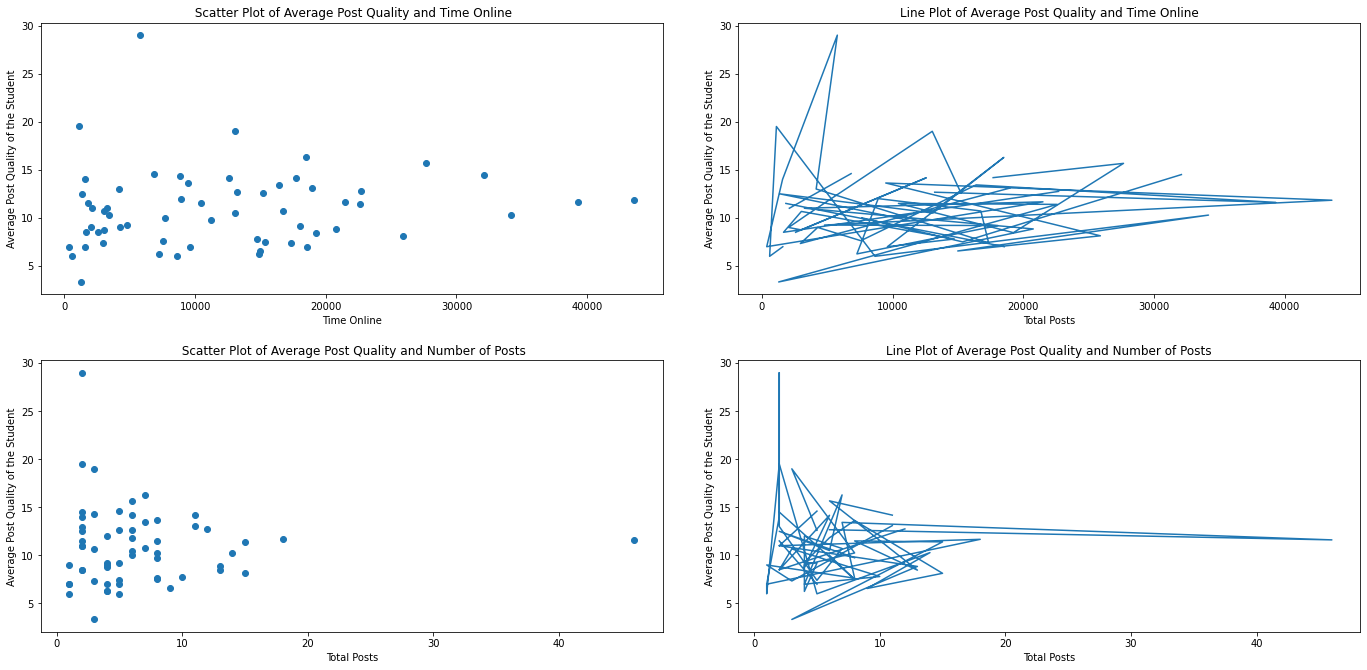

In [ ]:
fig, plot = plt.subplots(2,2, figsize=(20,10))
fig.tight_layout(pad=4.5)

plot[0,0].scatter(data['timeonline'], avg_post_quality)
plot[0,0].set(xlabel = 'Time Online', ylabel='Average Post Quality of the Student', title = ' Scatter Plot of Average Post Quality and Time Online')

plot[0,1].plot(data['timeonline'], avg_post_quality)
plot[0,1].set(xlabel = 'Total Posts', ylabel='Average Post Quality of the Student', title = 'Line Plot of Average Post Quality and Time Online')

plot[1,0].scatter(data['total_posts'], avg_post_quality)
plot[1,0].set(xlabel = 'Total Posts', ylabel='Average Post Quality of the Student', title = ' Scatter Plot of Average Post Quality and Number of Posts')

plot[1,1].plot(data['total_posts'], avg_post_quality)
plot[1,1].set(xlabel = 'Total Posts', ylabel='Average Post Quality of the Student', title = 'Line Plot of Average Post Quality and Number of Posts')

plt.show()

See! Trends change! 

**To do:** Comment on the new trends above

Let's also have a look of how the number of each type of reaction varies as number of posts increase

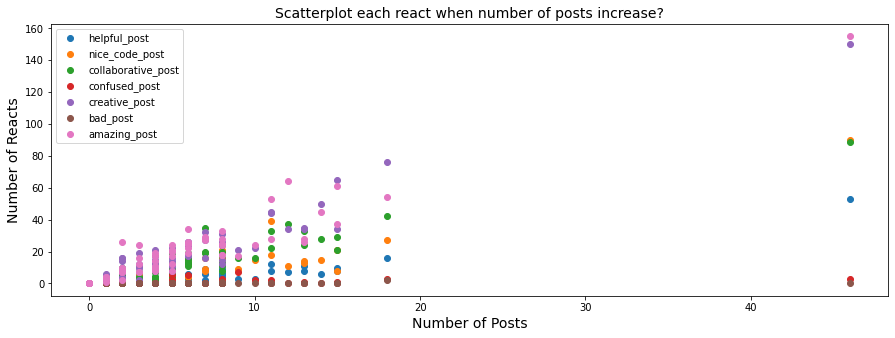

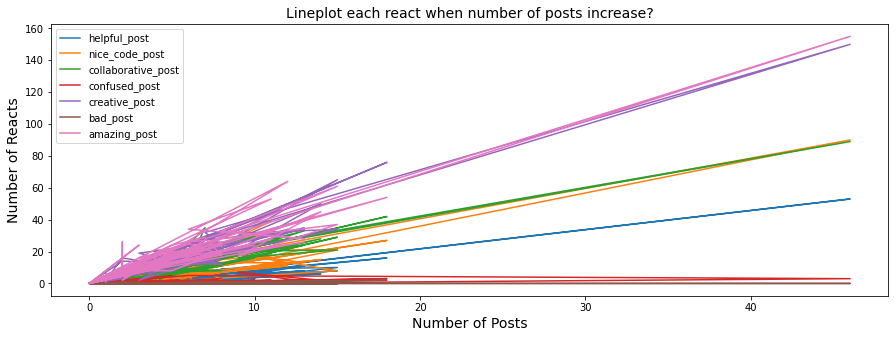

In [ ]:
post_list = ['helpful_post', 'nice_code_post', 'collaborative_post',	'confused_post',	'creative_post',	'bad_post',	'amazing_post']
plt.figure(figsize=(15,5))
for post in post_list:
  plt.scatter(data['total_posts'], data[post], label = post)

plt.xlabel('Number of Posts', fontsize=14)
plt.ylabel('Number of Reacts', fontsize=14)
plt.title('Scatterplot each react when number of posts increase?', fontsize=14)
plt.legend()
plt.show()

plt.figure(figsize=(15,5))
for post in post_list:
  plt.plot(data['total_posts'], data[post], label = post)

plt.xlabel('Number of Posts', fontsize=14)
plt.ylabel('Number of Reacts', fontsize=14)
plt.title('Lineplot each react when number of posts increase?', fontsize=14)
plt.legend()




The trend is general. Negative posts (bad and confusing) remain static as number of posts increase. This was the same trend highlighted by avg_quality of posts. As far as positve posts are concerned, amazing and creative are the most common reactions, followed by nice_code and collaborative, and finally helpful. Now we can also see that the trend of amazing and creative is roughly the same. This could indicate that the two reactions might be used interchangeably. 

# Question 7:

What is the performance of a student who did not spend any time online on the platform or did not make any posts? Is it possible that a student graded strongly with interpersonal skills is unable to contribute on an online forum?

While we can observe general trends in students' performance, we also wanted to look for anomalies. As the grading for the class in our dataset was not done on the basis of their posts, we must look out for cases where students, otherwise judged to possess strong interpersonal skills, were unable to contribute to their class's discussion due to the online setting of class discussion.

It should, however, be noted that the conclusions drawn are not quite straightforward due to the subject matter. The class under discussion is of an Algorithms course. Some degree of discussion, especially regarding the code, would have to be done online, even in an in-person class setting, such as sharing and commenting on code.

Starting off, we will begin our discussion by looking at students who had 0 active posts. In our discussion we will avoid discussing the students who spent no time online, as this could be due to a variety of reasons (dropping out of the course, etc). 

In [ ]:
no_post_data = data[(data.total_posts == 0) & (data.timeonline != 0)]
no_post_data

,total_posts,helpful_post,nice_code_post,collaborative_post,confused_post,creative_post,bad_post,amazing_post,post_quality,eff_post_quality,timeonline,sk1_score,sk2_score,sk3_score,sk4_score,sk5_score,avg_score,approved
28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,734.0,0.0,0.0,0.1,0.0,0.0,0.02,0
68,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,988.0,0.0,0.0,0.1,0.0,0.0,0.02,0


This data did not provide us with a lot of useful information. The sample size is very small to draw reasonable conclusions. Both students have spent generally small amounts of time online, and have both been awarded very slow average scores (0.02). 

To get more reasonable conclusions from our data set, we will be expanding our definition, and will be considering the students up to the lower 10th percentile in terms of total post contribution.

We are looking for students who do not have a large number of posts, but are graded strongly.

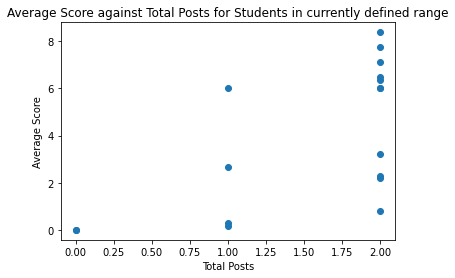

In [ ]:
online_data = data[(data.timeonline != 0)]
online_data
baseline = online_data.quantile(0.1)
# fix the above, for now it appears to work but it doesn't feel right, is it checking axis to be total_posts?
low_post_data_10 = online_data[(online_data.total_posts <= baseline.total_posts)]
low_post_data_10

plt.scatter(low_post_data_10.total_posts, low_post_data_10['avg_score'])
plt.title("Average Score against Total Posts for Students in currently defined range")
plt.xlabel("Total Posts")
plt.ylabel("Average Score")
plt.show()

We now have some data from which we can extract useful information. We are looking for students that have a significant average grade (avg_score), but fall within the bottom 10th percentile in terms of total number of posts.

However an important note to be made is that the number of posts of the student on the 10th percentile is the same as the number of posts made by a student on the 25th percentile. Hence, our sample size has increased to about 25% of the participating class (students that spent non-zero time active).

To reach this conclusion, we will further divide the data into two subcategories: 1. Below the average grade 2. Above the average grade

Considering the first case: scores below the average grade (avg_score) 

Mean:  6.284193548387097


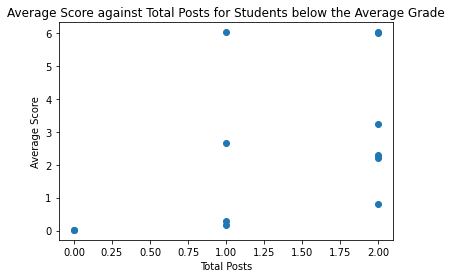

In [ ]:
data_mean = online_data.avg_score.mean()
print("Mean: ",data_mean)
below_mean = low_post_data_10[low_post_data_10.avg_score <= data_mean]
# below_mean
# I personally think simply showing the table is a better representation because of our small sample size, to be discussed

plt.scatter(below_mean.total_posts, below_mean['avg_score'])
plt.title("Average Score against Total Posts for Students below the Average Grade")
plt.xlabel("Total Posts")
plt.ylabel("Average Score")
plt.show()

Of those below the average grade, 3 students had scores that were very close to the average grade of the class. If the trend of higher posts (active participation) being linked to higher grades was true in all cases, we would not see such cases. We can further study this trend by observing the students above the average grade falling in the same category.

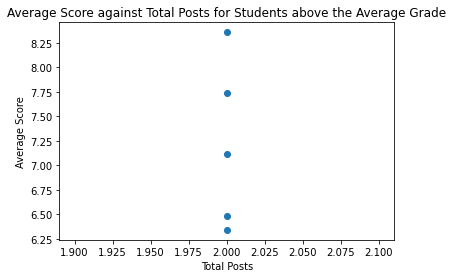

In [ ]:
above_mean =  low_post_data_10[low_post_data_10.avg_score > data_mean]
# above_mean

plt.scatter(above_mean.total_posts, above_mean['avg_score'])
plt.title("Average Score against Total Posts for Students above the Average Grade")
plt.xlabel("Total Posts")
plt.ylabel("Average Score")
plt.show()

As can be seen above, we have 5 students that have scored above the average score of the class. These students have made very few posts (bottom 25%) and yet managed to score better than most of their peers. This clearly points towards the possibility of students, who otherwise have strong interpersonal skills, to be unable to perform as well in an online setting.

#Question 8/9: 

**Are some types of reactions used more frequently than others? Can a trend be established between the reactions? (Most frequently used and least frequently) and if such a trend exists, the causality/bias behind this trend?**

In order to understand if a student’s online participation is correlated to their in-class judgement, it is important to observe the trends in the types of reactions received on a student’s post and their quality. To make the interpretation easier, the reactions have been categorized into positive and negative reactions.  The ‘confusing’ and ‘bad’ posts have been placed under negative reactions while the rest have been considered as positive reactions. From the given data set, the frequencies of each types of reactions are compared. The Bar graph below summarizes these results:

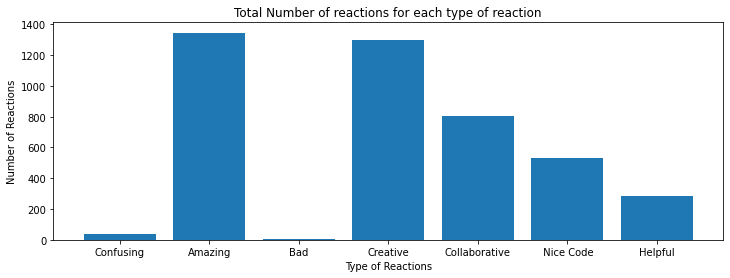

In [ ]:
reactions= ('Confusing','Amazing', 'Bad','Creative','Collaborative', ' Nice Code', 'Helpful')

sum = data.sum(axis=0)
y_pos =[sum.confused_post,sum.amazing_post, sum.bad_post, sum.creative_post, sum.collaborative_post, sum.nice_code_post, sum.helpful_post]

plt.figure(figsize=(12,4))
plt.bar(reactions, y_pos, align='center', alpha=1)
plt.xticks(reactions)
plt.ylabel('Number of Reactions')
plt.xlabel('Type of Reactions')
plt.title('Total Number of reactions for each type of reaction')
plt.show()


According to the bar graph above, we can infer that the positive reactions are more frequently used in comparison to the negative ones. 


A line graph further helps us visualize any trend that exists between the different reactions. The reactions have been placed in order from the best to the worst:







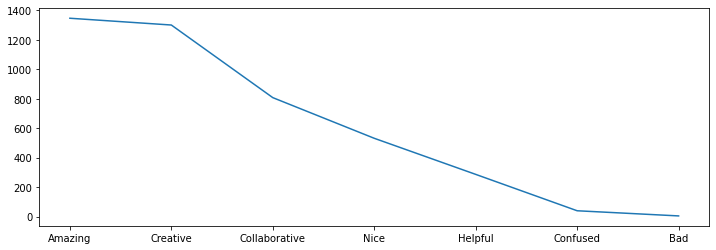

In [ ]:
reactions= ('Amazing','Creative','Collaborative','Nice','Helpful', 'Confused','Bad')

sum = data.sum(axis=0)
y_pos =[sum.amazing_post,sum.creative_post, sum.collaborative_post, sum.nice_code_post, sum.helpful_post, sum.confused_post, sum.bad_post]

plt.figure(figsize=(12,4))
plt.plot(reactions,y_pos)
plt.show()



There is a significant decline between the two extreme reactions, i.e., ‘Amazing’ and ‘bad’ posts. The ‘amazing posts’ are considerably more popular than the ‘bad posts.’ This trend as depicted from our data indicates that most of the posts made by the students received a positive response. 

To check if there is any biasness behind this trend, we plot a graph to observe if the students were approved based on the quality of their posts.


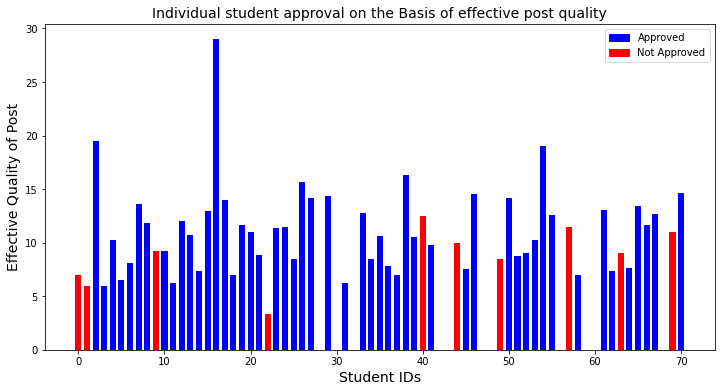

Text(0.5, 1.0, 'Student Approval and Effective Post Quality')

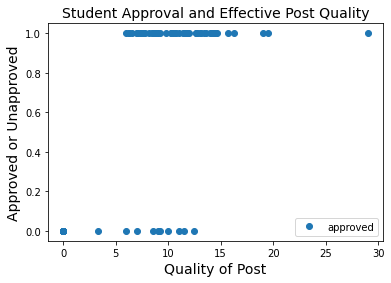

In [ ]:
plt.figure(figsize=(12,6))

coloredObjs=[]

for row in data.itertuples():
  if(row.approved== 1):
    coloredObjs.append('b')
  else:
    coloredObjs.append('r')


plt.bar(data.index,data['eff_post_quality'],width=0.7,color=coloredObjs)
plt.ylabel('Effective Quality of Post', fontsize = 14)
plt.xlabel('Student IDs', fontsize = 14)
plt.title('Individual student approval on the Basis of effective post quality', fontsize = 14)
pop_a = mpatches.Patch(color='blue', label='Approved') 
pop_b = mpatches.Patch(color='red', label='Not Approved') 
plt.legend(handles=[pop_a,pop_b]) 
plt.show()

data.plot(x = 'eff_post_quality', y = 'approved',style='o')
plt.ylabel('Approved or Unapproved', fontsize = 14)
plt.xlabel('Quality of Post', fontsize = 14)
plt.title('Student Approval and Effective Post Quality', fontsize = 14)


Here we can see that there are a higher number of students that were approved. The graph for both the approved and not approved is concentrated towards the lower quality posts, i.e. less than 15, with a few posts for the approved that were of excpetionally high quality. Hence, we can say that the approval of the students had no positive correlation with the quality of the posts. So, in order to increase the approval rate, the quality of posts does not need to be improved.

Team:<br>
Hareem Raza(Lead)<br>
Hassaan Ahmad(Co-lead)<br>
Sheza Munir<br>
Ajwa Shahid<br>
Naima Abrar<br>
Faaiq Bilal<br>
Hasseeb Ahmed<br>
